In [729]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv',encoding='big5hkscs')
data = data.rename({'日期':'date', '測站':'location', '測項':'features'},axis = 1)

f_ls = list(data['features'].drop_duplicates())
dict_ls = {i:np.array(data.groupby(by=['features']).get_group(i).iloc[:,3:27]).reshape(-1) for i in f_ls}

processed = pd.DataFrame.from_dict(dict_ls,orient = 'columns',dtype = float)
x_train1=processed
processed['RAINFALL'] = processed['RAINFALL'].apply(lambda x: 0 if x == 'NR' else x)

x_train2=processed[['PM2.5']]
processed

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,14.0,1.8,0.51,0.20,0.9,16.0,17.0,16.0,56.0,26.0,0,77.0,1.8,2.0,37.0,35.0,1.4,0.5
1,14.0,1.8,0.41,0.15,0.6,9.2,9.8,30.0,50.0,39.0,0,68.0,2.0,2.0,80.0,79.0,1.8,0.9
2,14.0,1.8,0.39,0.13,0.5,8.2,8.7,27.0,48.0,36.0,0,67.0,1.7,2.0,57.0,2.4,1.0,0.6
3,13.0,1.8,0.37,0.12,1.7,6.9,8.6,23.0,35.0,35.0,0,74.0,1.6,1.9,76.0,55.0,0.6,0.3
4,12.0,1.8,0.35,0.11,1.8,6.8,8.5,24.0,25.0,31.0,0,72.0,1.9,1.9,110.0,94.0,1.7,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,14.0,1.8,0.48,0.15,1.0,13.0,14.0,18.0,54.0,37.0,0,76.0,2.6,1.9,109.0,97.0,1.0,1.4
5756,13.0,1.8,0.47,0.16,1.5,13.0,15.0,14.0,66.0,28.0,0,80.0,2.2,1.9,108.0,107.0,1.7,1.3
5757,13.0,1.8,0.51,0.16,1.5,13.0,15.0,13.0,50.0,17.0,0,82.0,2.3,1.9,114.0,118.0,1.5,1.6
5758,13.0,1.8,0.57,0.19,1.1,13.0,14.0,13.0,32.0,24.0,0,84.0,2.3,2.0,108.0,100.0,2.0,1.8


In [773]:

X0=np.matrix(processed[['RAINFALL']].loc[8::24])
X1=np.matrix(processed[['WIND_SPEED']].loc[8::24])
X2=np.matrix(processed[['SO2']].loc[8::24])
X3=np.matrix(x_train2.loc[3::24])
X4=np.matrix(x_train2.loc[4::24])
X5=np.matrix(x_train2.loc[5::24])
X6=np.matrix(x_train2.loc[6::24])
X7=np.matrix(x_train2.loc[7::24])
X8=np.matrix(x_train2.loc[8::24])
X=np.concatenate((X2,X8),axis=1).astype(float)
#X=np.matrix([x_train2.loc[0::24],x_train2.loc[1::24]])
Y=np.matrix(x_train2.loc[9::24])
#X=np.matrix([np.array(processed.iloc[i*24+8:i*24+9,:].T).reshape(18) for i in range(0,240)]).astype(float)
X2

matrix([[ 5.1],
        [ 3.3],
        [ 2.3],
        [ 2.9],
        [ 3.4],
        [ 5.6],
        [ 6. ],
        [ 7.3],
        [ 1.6],
        [ 1.1],
        [ 2.9],
        [ 1.5],
        [ 0.9],
        [ 5.6],
        [ 0.8],
        [ 3.1],
        [ 5.6],
        [ 1.4],
        [ 4.4],
        [ 3.3],
        [ 1.6],
        [ 2.2],
        [ 5.5],
        [ 1.1],
        [ 3.1],
        [ 1.7],
        [ 2.6],
        [ 1.1],
        [ 2.1],
        [ 1. ],
        [ 1.4],
        [ 1.3],
        [ 1.3],
        [ 1.4],
        [ 0.8],
        [ 5.3],
        [ 1.9],
        [ 3.5],
        [ 0.8],
        [ 1.4],
        [ 5. ],
        [ 1.3],
        [ 1.3],
        [ 3. ],
        [ 1. ],
        [ 1.5],
        [ 1.4],
        [ 2.8],
        [ 1.4],
        [ 3.5],
        [ 3.9],
        [ 4.2],
        [ 3.6],
        [ 2.2],
        [ 5.9],
        [ 5.8],
        [ 6.5],
        [ 2.5],
        [ 4.1],
        [ 2.8],
        [ 1.6],
        [ 2.1],
        

In [656]:
X

matrix([['X6;X7;X8']], dtype='<U8')

In [ ]:
def para_for_iter(x,y):
    k=x.T.dot(x)
    l=x.T.dot(np.ones(len(x)))
    m=x.T.dot(y)
    return k,l,m
def gradient_descent(x,y,w0,b0,inter_times,lr):
    w_result=[w0]
    b_result=[b0]
    k=x.T.dot(x)
    l=x.T.dot(np.ones(len(x)))
    m=x.T.dot(y)
    loss=[]
    for i in range(inter_times):
        w_result.append(w_result[i]+lr*(m-k*w_result[-1]-l*b_result[i]))
        b_result.append(b_result[i]-lr*(-sum(y)+sum(x)*w_result[-1]+len(x)*b_result[i]))
        loss.append(0.5*sum(y-w_result[i]*x-b_result[i])**2)
    return w_result,b_result,loss

    

In [513]:
def gradient_descent1(X,Y,w0,b0,iter_times,lr):
    w_result=[w0]
    b_result=[b0]
    loss=[]
    

    
    for i in range(iter_times):
        grad = Y-X.dot(w_result[-1])-np.matrix([b_result[-1]*np.ones(X.shape[0])]).T
        w_grad = -1*X.T.dot(grad)
        b_grad = -1*np.matrix(np.ones(X.shape[0])).dot(grad)
        w_result.append(w_result[-1]-lr*w_grad)
        b_result.append(b_result[-1]-lr*float(b_grad))
        loss.append((Y-X.dot(w_result[-1])-np.matrix([b_result[-1]*np.ones(X.shape[0])]).T).T.dot((Y-X.dot(w_result[-1])-np.matrix([b_result[-1]*np.ones(X.shape[0])]).T)))
    return w_result,b_result,loss

In [774]:
#X=np.matrix([np.random.normal(size=5) ]).T
#Y=X.dot(np.matrix('1'))+np.matrix(np.ones(5)).T
w0=np.matrix([1]*1).T
b0=2
w_result=[w0]
b_result=[b0]

a,b,c=gradient_descent1(X2,Y,w0,b0,10000,0.000005)
c

[matrix([[98013.94133234]]),
 matrix([[96582.65694977]]),
 matrix([[95196.81406281]]),
 matrix([[93854.96736329]]),
 matrix([[92555.71751405]]),
 matrix([[91297.70968678]]),
 matrix([[90079.63214632]]),
 matrix([[88900.21487995]]),
 matrix([[87758.22827035]]),
 matrix([[86652.48181077]]),
 matrix([[85581.82286095]]),
 matrix([[84545.13544279]]),
 matrix([[83541.33907418]]),
 matrix([[82569.38763998]]),
 matrix([[81628.26829892]]),
 matrix([[80717.00042523]]),
 matrix([[79834.63458401]]),
 matrix([[78980.25153906]]),
 matrix([[78152.96129244]]),
 matrix([[77351.90215438]]),
 matrix([[76576.23984299]]),
 matrix([[75825.1666124]]),
 matrix([[75097.90040878]]),
 matrix([[74393.68405314]]),
 matrix([[73711.78445013]]),
 matrix([[73051.49182199]]),
 matrix([[72412.11896693]]),
 matrix([[71793.000541]]),
 matrix([[71193.49236292]]),
 matrix([[70612.97074087]]),
 matrix([[70050.83182087]]),
 matrix([[69506.49095574]]),
 matrix([[68979.38209418]]),
 matrix([[68468.95718936]]),
 matrix([[67974.6

In [775]:
c[-100:]

[matrix([[48990.1399904]]),
 matrix([[48990.13575566]]),
 matrix([[48990.13152367]]),
 matrix([[48990.12729444]]),
 matrix([[48990.12306797]]),
 matrix([[48990.11884425]]),
 matrix([[48990.11462328]]),
 matrix([[48990.11040505]]),
 matrix([[48990.10618958]]),
 matrix([[48990.10197685]]),
 matrix([[48990.09776687]]),
 matrix([[48990.09355963]]),
 matrix([[48990.08935513]]),
 matrix([[48990.08515336]]),
 matrix([[48990.08095434]]),
 matrix([[48990.07675805]]),
 matrix([[48990.07256449]]),
 matrix([[48990.06837367]]),
 matrix([[48990.06418557]]),
 matrix([[48990.0600002]]),
 matrix([[48990.05581756]]),
 matrix([[48990.05163764]]),
 matrix([[48990.04746045]]),
 matrix([[48990.04328597]]),
 matrix([[48990.03911422]]),
 matrix([[48990.03494518]]),
 matrix([[48990.03077886]]),
 matrix([[48990.02661525]]),
 matrix([[48990.02245435]]),
 matrix([[48990.01829617]]),
 matrix([[48990.01414069]]),
 matrix([[48990.00998792]]),
 matrix([[48990.00583785]]),
 matrix([[48990.00169049]]),
 matrix([[48989.

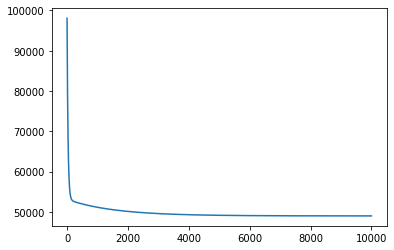

In [776]:
result=np.array(c).flatten()

import matplotlib.pyplot as plt
plt.plot([i for i in range(10000)],result)

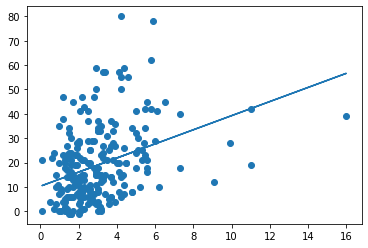

In [777]:
plt.scatter(np.array(X2).flatten(), np.array(Y).flatten())
plt.plot(np.array(X2).flatten(),np.array(X2).flatten()*float(a[-1])+float(b[-1]))
plt.show()

In [530]:
len(list(str(5**200)))

140

In [531]:
200/3*2

133.33333333333334

In [608]:
w0=np.matrix([1]*162)
w0.T

matrix([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],